# Seaborn Basics
- matplotlib을 기반으로 다양한 시각화 기법을 제공하는 라이브러리
    - histplot, kdeplot, jointplot, FacetGrid, etc.
- pandas DataFrame과 호환이 잘 된다.
    - e.g. sns.xxxplot(data=df)

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

sns.set_theme(style='whitegrid')
penguins = sns.load_dataset('penguins').dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 경향성 표현
### lineplot
- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 선 그래프
- 수치형 지표드 간의 경향을 파악할 때 많이 사용

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

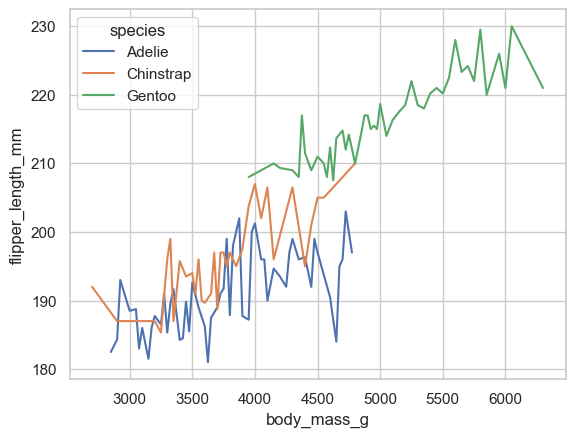

In [3]:
sns.lineplot(
    data=penguins, 
    x='body_mass_g', 
    y='flipper_length_mm',
    ci=None,
    hue='species'
)

### Pointplot
- 특정 수치 데이터를 error bar와 함께 출력해주는 plot
- 수치 데이터를 다양한 각도에서 한 번에 바라보고 싶을 때 사용
- 데이터와 error bar를 한 번에 표시하기 때문에, 살펴보고 싶은 특정 지표들만 사용하는 것이 좋다.

<Axes: xlabel='species', ylabel='body_mass_g'>

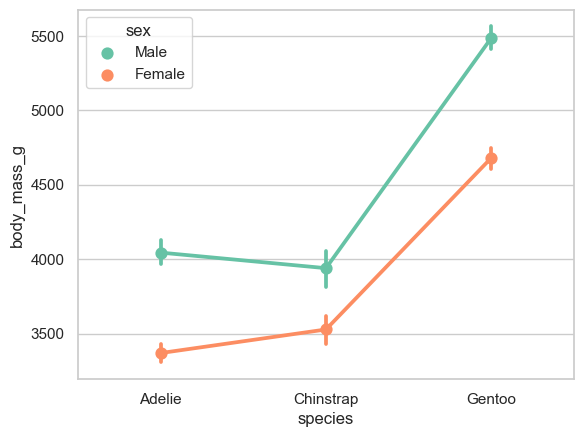

In [4]:
sns.pointplot(
    data=penguins,
    x='species',
    y='body_mass_g',
    hue='sex',
    palette='Set2' # seaborn color palette
)

## 경향성 표현
### Histplot
- 히스토그램 출력
- 전체 데이터를 특정 구간별로 정보를 확인할 때 사용

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

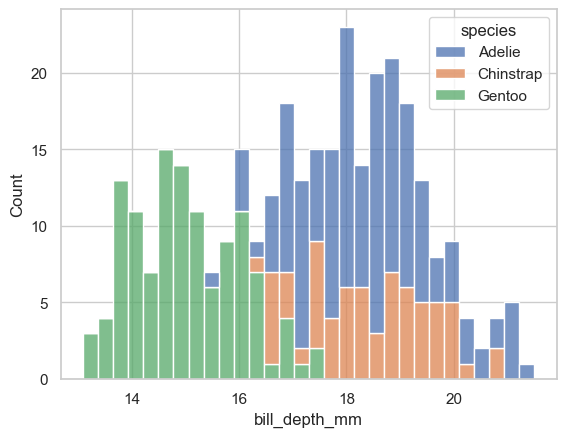

In [5]:
sns.histplot(
    data=penguins,
    x='bill_depth_mm',
    bins=30,
    hue='species',
    multiple='stack'
)

### Barplot
- 데이터에 대한 값의 크기를 막대로 보여주는 막대그래프

<Axes: xlabel='island', ylabel='body_mass_g'>

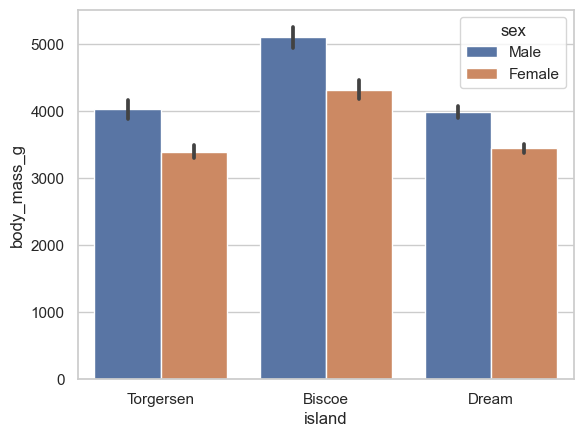

In [6]:
sns.barplot(
    data=penguins,
    x='island',
    y='body_mass_g',
    hue='sex'
)

### Countplot
- 범주형 속성을 가지는 데이터들의 히스토그램을 보여주는 plot
- 종류별 count

<Axes: xlabel='species', ylabel='count'>

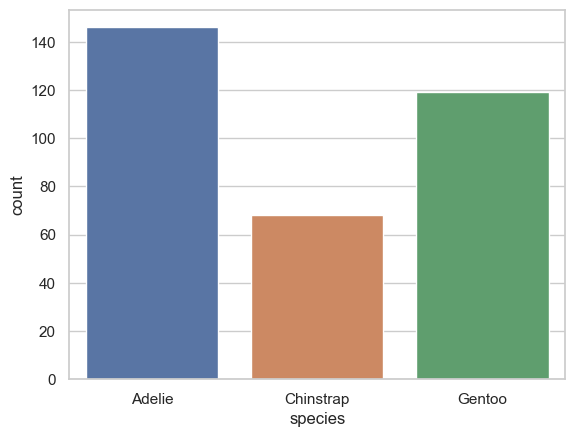

In [7]:
sns.countplot(
    data=penguins,
    x='species'
)

<Axes: xlabel='count', ylabel='species'>

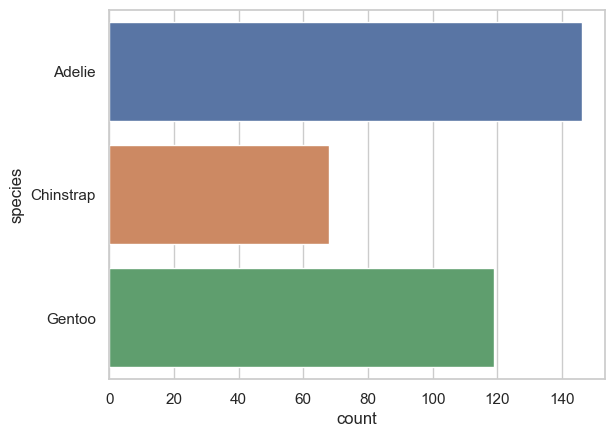

In [8]:
sns.countplot(
    data=penguins,
    y='species'
)

## 분포 표현
### Boxplot
- 데이터의 사분위수(quartile)를 표시하는 plot
- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법
- 이상치를 찾기 쉽다.

<Axes: xlabel='species', ylabel='body_mass_g'>

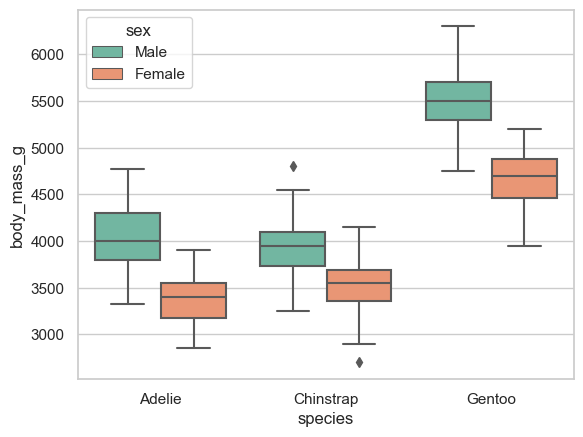

In [9]:
sns.boxplot(
    data=penguins,
    x='species',
    y='body_mass_g',
    hue='sex',
    palette='Set2'
)

<Axes: xlabel='body_mass_g', ylabel='species'>

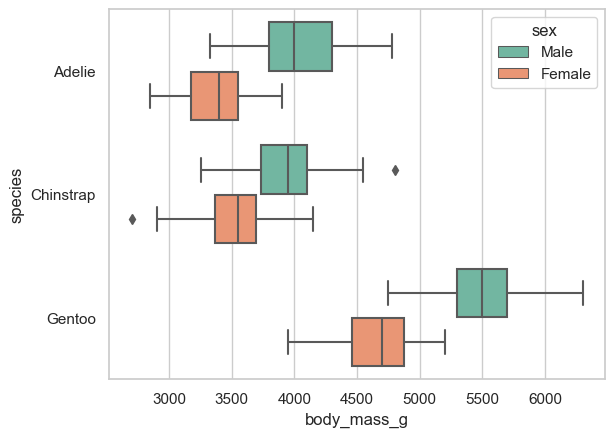

In [10]:
sns.boxplot(
    data=penguins,
    y='species',
    x='body_mass_g',
    hue='sex',
    palette='Set2'
)

### swarmplot
- 전체적인 데이터의 분포를 보여주는 plot
- boxplot과 함께 표시하면, 평균 근처에 데이터가 얼마나 있는지(boxplot) 전체적으로 어떻게 퍼져있는지(swarmplot) 확인이 가능하다.

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

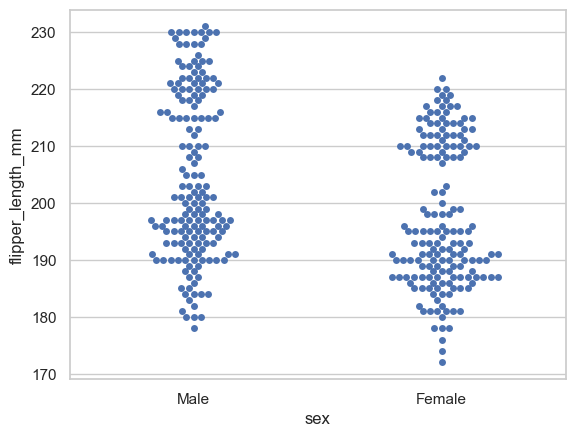

In [11]:
sns.swarmplot(
    data=penguins,
    x='sex',
    y='flipper_length_mm'
)

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

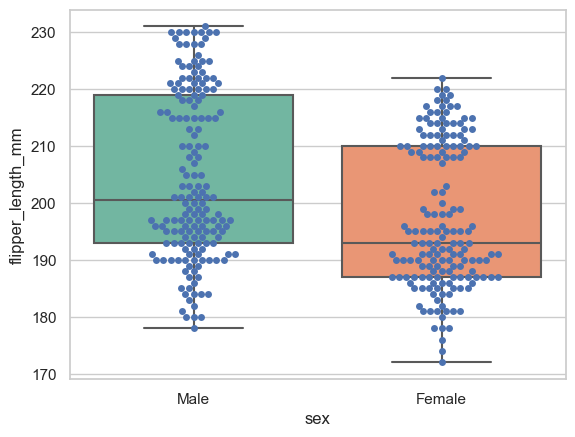

In [16]:
sns.boxplot(
    data=penguins,
    x='sex',
    y='flipper_length_mm',
    palette='Set2'
)
sns.swarmplot(
    data=penguins,
    x='sex',
    y='flipper_length_mm'
)

### Scatterplot
- x, y에 대한 전체적인 분포를 확인하는 plot
- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둔다.

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

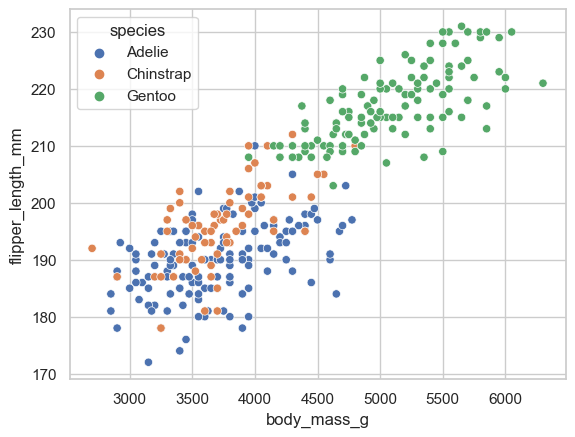

In [17]:
sns.scatterplot(
    data=penguins,
    x='body_mass_g',
    y='flipper_length_mm',
    hue='species'
)

## 연관성 표현
### Heatmap
- 데이터에 대한 정도 차이를 색 차이로 보여주는 plot
- 이름 그대로, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여준다.
- feature간 관계를 시각화할 때 많이 사용한다.

In [18]:
# 각 column간 상관관계를 파악하기 위해 Correlation matrix를 만든다.
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

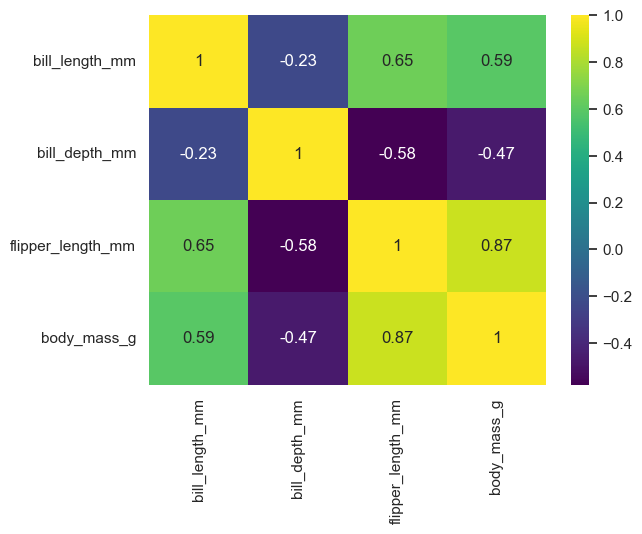

In [19]:
sns.heatmap(
    penguins.corr(),
    annot=True,
    cmap='viridis'
)

### Pairplot
- Heatmap과 비슷하게 feature간 관계를 시각화할 때 많이 사용한다.

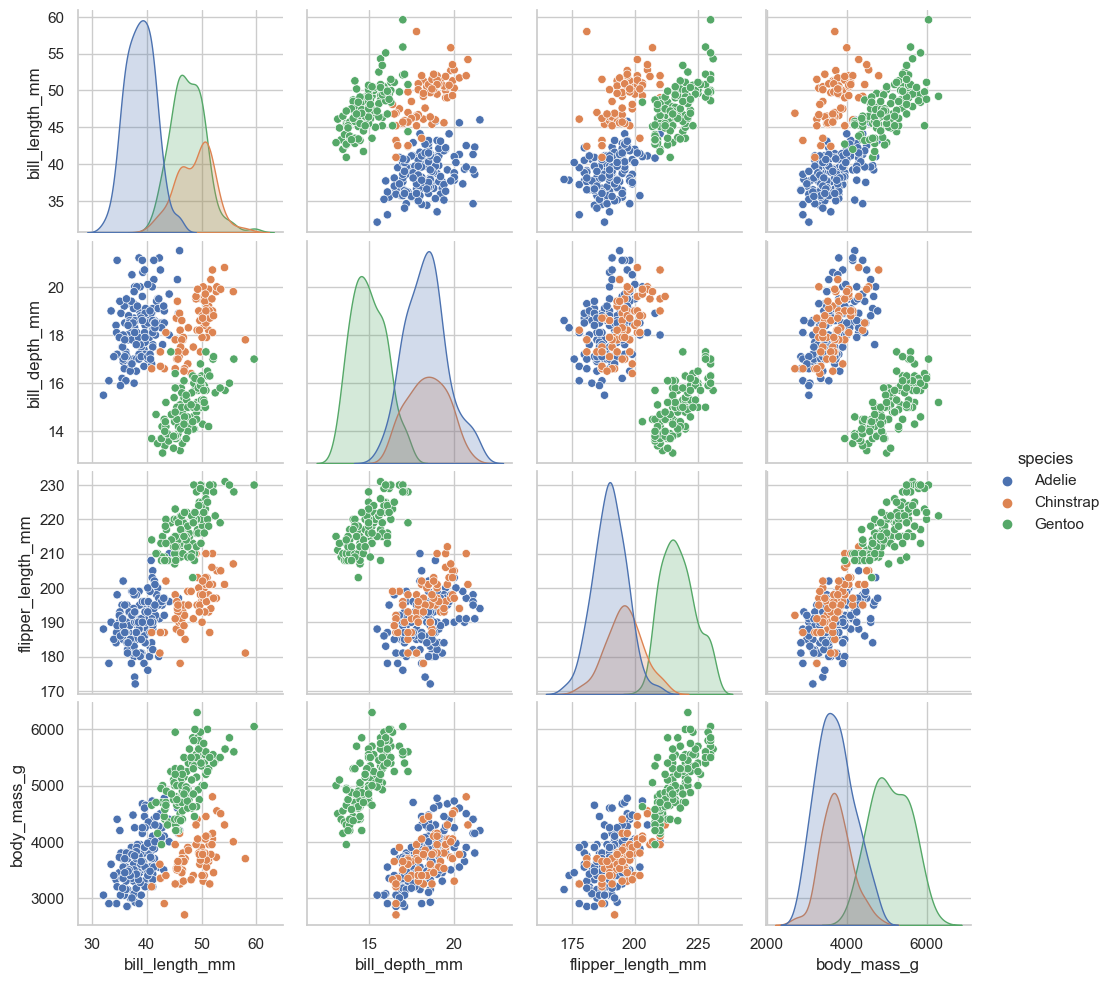

In [20]:
sns.pairplot(
    data=penguins,
    hue='species'
)